# Census  income Dataset



## The Data
We will be using a subset of the Adult Income Dataset  obtained from Kaggle:
(https://www.kaggle.com/dfsets/wenruliu/adult-income-dfset)



### Our Goal:
Build and compare a Neural Network (NN) model using Keras
TensorFlow with a traditional Machine Learning model, specifically Random Forest and Logistic
Regression. You will work on a classification problem using tabular df (dfset is attached).
The goal is to apply the full machine learning pipeline, from df preprocessing and feature
engineering to model building and hyperparameter tuning for Machine Learning (using random search)

----
-----
There are many Adult income Dataset
 on Kaggle ,Here is the information on this particular df set:

<table border="1" class="dfframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Feature Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>age	</td>
      <td>Represents an individual’s years on earth.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>workclass
    </td>
      <td>Represents an individual’s employment status.	</td>
    </tr>
    <tr>
      <th>2</th>
      <td>fnlwgt	</td>
      <td>Represents the final weight. This is the number of people the census believes the entry represents.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>education	</td>
      <td>Represents an individual’s highest level of education achieved in object form.	</td>
    </tr>
    <tr>
      <th>4</th>
      <td>educational-num	</td>
      <td>Represents an individual’s highest level of education achieved in numerical form.	</td>
    </tr>
    <tr>
      <th>5</th>
      <td>marital-status	</td>
      <td>Represents an individual’s civil status in relation to a significant other.</td>
    </tr>
    <tr>
      <th>6</th>
      <td>occupation	</td>
      <td>Represents an individual’s general occupation.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>relationship	</td>
      <td>Represents an individual’s relation to others in a family unit. The options aren’t consistent and seem to overlap with marital-status column.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>race</td>
      <td>Represents an individual’s shared physical or general region of origin</td>
    </tr>
    <tr>
      <th>9</th>
      <td>gender	</td>
      <td> Represents an individual’s gender ,this dfset only had two options for gender..</td>
    </tr>
    <tr>
      <th>10</th>
      <td>capital-gain	</td>
      <td> Represents an individual’s profit from the sale of property or an investment.</td>
    </tr>
    <tr>
      <th>11</th>
      <td>capital-loss</td>
      <td>Represents an individual’s loss from the sale of property or an investment.</td>
    </tr>
    <tr>
      <th>12</th>
      <td>hours-per-week	</td>
      <td>Represents an individual’s hours worked per week.</td>
    </tr>
    <tr>
      <th>13</th>
      <td>native-country</td>
      <td>Represents an individual’s country of origin.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>income	</td>
      <td>Income category (<=50K or >50K, target variable for classification).</td>
    </tr>
    <tr>
     
      
  </tbody>
</table>

---
----

##1-Descriptive Analytics

####Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, uniform, randint

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import (train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,auc,classification_report,make_scorer)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

###load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/adult.csv')

#####Viewing the First 10 Rows of the dataFrame

In [ ]:
df.head(10)

age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married                  ?      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married                  ?      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   
8       Never-married      Other-service      Unmarried  White  Female   
9  Married-civ-spouse       Craft-repair        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K  
5             0             0              30  United-States  <=50K  
6             0             0              40  United-States  <=50K  
7          3103             0              32  United-States   >50K  
8             0             0              40  United-States  <=50K  
9             0             0              10  United-States  <=50K

#####Viewing the Last 10 Rows of the dataFrame

In [ ]:
df.tail(10)

age     workclass  fnlwgt     education  educational-num  \
48832   32       Private   34066          10th                6   
48833   43       Private   84661     Assoc-voc               11   
48834   32       Private  116138       Masters               14   
48835   53       Private  321865       Masters               14   
48836   22       Private  310152  Some-college               10   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship  \
48832  Married-civ-spouse  Handlers-cleaners        Husband   
48833  Married-civ-spouse              Sales        Husband   
48834       Never-married       Tech-support  Not-in-family   
48835  Married-civ-spouse    Exec-managerial        Husband   
48836       Never-married    Protective-serv  Not-in-family   
48837  Married-civ-spouse       Tech-support           Wife   
48838  Married-civ-spouse  Machine-op-inspct        Husband   
48839             Widowed       Adm-clerical      Unmarried   
48840       Never-married       Adm-clerical      Own-child   
48841  Married-civ-spouse    Exec-managerial           Wife   

                     race  gender  capital-gain  capital-loss  hours-per-week  \
48832  Amer-Indian-Eskimo    Male             0             0              40   
48833               White    Male             0             0              45   
48834  Asian-Pac-Islander    Male             0             0              11   
48835               White    Male             0             0              40   
48836               White    Male             0             0              40   
48837               White  Female             0             0              38   
48838               White    Male             0             0              40   
48839               White  Female             0             0              40   
48840               White    Male             0             0              20   
48841               White  Female         15024             0              40   

      native-country income  
48832  United-States  <=50K  
48833  United-States  <=50K  
48834         Taiwan  <=50K  
48835  United-States   >50K  
48836  United-States  <=50K  
48837  United-States  <=50K  
48838  United-States   >50K  
48839  United-States  <=50K  
48840  United-States  <=50K  
48841  United-States   >50K

#####Finding the Total Number of Rows in the dataFrame

In [ ]:
len(df)

48842

#####Checking the Dimensions of the dataFrame

In [ ]:
df.shape

(48842, 15)

####Understanding Data Types in a  DataFrame

In [ ]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

####Detecting Missing Values in a DataFrame

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

####Calculating the Total Number of Missing Values in a DataFrame

In [ ]:
df.isnull().sum().sum()

0

####Counting Unique Values in Each Column of a DataFrame

In [ ]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

####Identifying and Counting Duplicate Rows in a DataFrame

In [ ]:
duplicates = df.duplicated().sum()
duplicates

52

####Extracting Duplicate Rows from a DataFrame

In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

age         workclass  fnlwgt     education  educational-num  \
864     24           Private  194630     Bachelors               13   
11189   37           Private   52870     Bachelors               13   
11212   29           Private   36440     Bachelors               13   
13848   30           Private  180317     Assoc-voc               11   
15960   18      Self-emp-inc  378036          12th                8   
18476   39           Private  184659       HS-grad                9   
19399   19           Private  130431       5th-6th                3   
19726   41           Private  116391     Bachelors               13   
20606   25           Private  308144     Bachelors               13   
21162   25           Private  308144     Bachelors               13   
21385   90           Private   52386  Some-college               10   
24361   21           Private  243368     Preschool                1   
25189   29                 ?   41281     Bachelors               13   
25452   21           Private  250051  Some-college               10   
25652   23           Private  239539       HS-grad                9   
26122   21           Private  301694       HS-grad                9   
26375   19                 ?  167428  Some-college               10   
27912   20           Private  107658  Some-college               10   
29365   25           Private  195994       1st-4th                2   
30862   31           Private  228873       HS-grad                9   
30971   19           Private  318822       HS-grad                9   
31340   21           Private  243368     Preschool                1   
33321   46           Private  173243       HS-grad                9   
34148   45           Private   82797     Bachelors               13   
34836   30           Private  144593       HS-grad                9   
34979   19           Private   97261       HS-grad                9   
35848   47           Private  199058  Some-college               10   
36767   43           Private  195258       HS-grad                9   
36848   22           Private  137876  Some-college               10   
37599   19           Private  138153  Some-college               10   
37771   19           Private  146679  Some-college               10   
38156   49           Private   31267       7th-8th                4   
38255   30           Private  111567       HS-grad                9   
38530   19           Private  139466  Some-college               10   
38581   25           Private  195994       1st-4th                2   
38648   44           Private  367749     Bachelors               13   
38775   49  Self-emp-not-inc   43479  Some-college               10   
40948   17           Private  153021          12th                8   
41965   25           Private  112835     Bachelors               13   
42153   23           Private  240137       5th-6th                3   
42594   28           Private  274679       Masters               14   
44201   23           Private  107882     Bachelors               13   
44511   27           Private  255582       HS-grad                9   
44803   42           Private  204235  Some-college               10   
45127   39           Private   30916       HS-grad                9   
45438   38           Private  207202       HS-grad                9   
46626   23           Private  250630     Bachelors               13   
46665   20                 ?  203353  Some-college               10   
46979   22                 ?  334593  Some-college               10   
47126   46           Private  133616  Some-college               10   
48274   19           Private  251579  Some-college               10   
48685   35           Private  379959       HS-grad                9   

              marital-status         occupation   relationship  \
864            Never-married     Prof-specialty  Not-in-family   
11189     Married-civ-spouse    Exec-managerial        Husband   
11212          Never-married       Adm-cleric

####Removing Duplicate Rows from a DataFrame

In [ ]:
df1=df.drop_duplicates()

####Verifying the Removal of Duplicates in a DataFrame

In [ ]:
df1.duplicated().sum()

0

####Get the dimensions of the data frame after deleting duplicate rows

In [ ]:
df1.shape

(48790, 15)

####Visualizing Statistical Summary of a DataFrame with Gradient Styling

In [ ]:
df1.describe().T.style.background_gradient(cmap='rainbow')

###**Overall Conclusions:**

**Distribution of Variables:** Most numerical variables ( capital-gain, capital-loss) are highly skewed, with the majority of values concentrated at 0.

**Working Hours:** The dataset reflects a typical working population, with most individuals working standard full-time hours.

**Education:** The dataset covers a wide range of educational attainment, but most individuals fall within the 9–12 years range (high school or some college).

**Potential Outliers:** Variables like fnlwgt, capital-gain, and capital-loss show extreme values that should be examined further.

####Accessing Column Names of a DataFrame

In [ ]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

###Counting Unique Values in a Specific Column

In [ ]:
df1['age'].value_counts()

age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

**Conclusions:**The age column has a wide range of values, with ages like 36, 35, and 33 being the most frequent, each occurring over 1,300 times. As the age values increase, their frequency decreases, with some of the highest ages (e.g., 88, 85, 87) having only a few occurrences. The distribution indicates that most of the individuals in the dataset are concentrated in the younger to middle-aged groups, with very few in the older age ranges.

In [ ]:
fig = px.histogram(df1, x='age', color='income',
                   barmode='overlay',
                   title='Age Distribution by Income',
                   labels={'age': 'Age', 'income': 'Income'},
                   template='plotly_dark')

fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

The chart reveals a non-linear relationship between age and income:

Younger age groups (20-30 years): Dominated by the lower-income category (<=50K), likely due to limited experience and early career stages.
Middle age groups (30-50 years): Show a noticeable increase in higher-income individuals (>50K), reflecting accumulated experience and career growth.
Older age groups (50+ years): The proportion of higher-income individuals begins to decline, possibly due to retirement or reduced working hours.

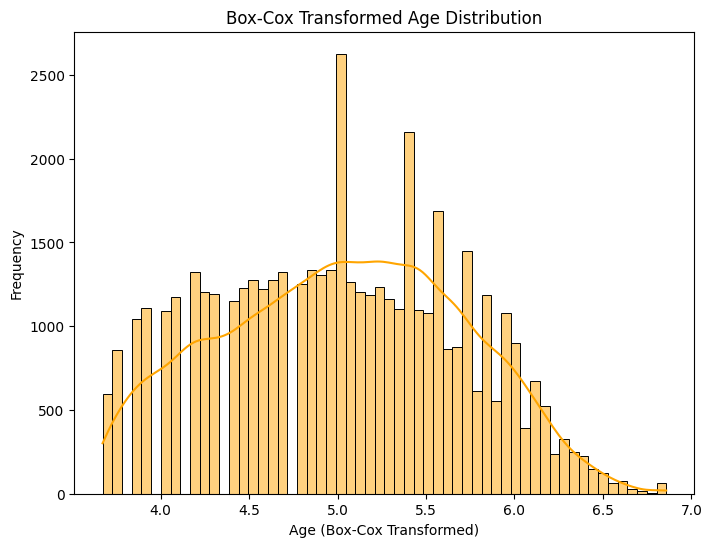

Lambda value used in Box-Cox: 0.17576420251155067


In [ ]:
df1['boxcox_age'], lambda_boxcox = stats.boxcox(df1['age'])
df1['age'] = df1['boxcox_age']
df1.drop(columns=['boxcox_age'], inplace=True)
plt.figure(figsize=(8, 6))
sns.histplot(df1['age'], kde=True, color='orange')
plt.title("Box-Cox Transformed Age Distribution")
plt.xlabel("Age (Box-Cox Transformed)")
plt.ylabel("Frequency")
plt.show()
print(f"Lambda value used in Box-Cox: {lambda_boxcox}")

 **Conclusions:**This histogram shows the Box-Cox transformed age distribution, illustrating how the transformation reduced skewness and made the data more symmetric.
The distribution is unimodal, with a peak around 5.0.
The transformation minimized the right skew, normalizing the data.
The orange density curve provides a smoothed visualization of the transformed distribution.
The Box-Cox transformation is commonly applied to stabilize variance and prepare data for statistical analyses.

###Categorizing Age into Age Groups (Young, Adult, Senior)

In [ ]:
df1['age_category'] = pd.cut(
    df['age'],
    bins=[0, 30, 50, 100],
    labels=['Young', 'Adult', 'Senior'],
    include_lowest=True
)

In [ ]:
df1['age_category'].value_counts()

age_category
Adult     23225
Young     15758
Senior     9807
Name: count, dtype: int64

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df1['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

 **Conclusions:**The workclass column shows that "Private" is the most common workclass, while there are notable numbers of missing values marked as "?". Rare categories such as "Never-worked" and "Without-pay" are very infrequent.

#### Identifying Columns Containing Specific Symbols

In [ ]:
symbols_to_find = ['?', '@', '!']
columns_with_symbols = [col for col in df1.columns if df1[col].isin(symbols_to_find).any()]
columns_with_symbols

['workclass', 'occupation', 'native-country']

####Replace unknown values ​​with majority class

In [ ]:
df1['workclass'] = df1['workclass'].replace('?', 'Private')
df1['occupation'] = df1['occupation'].replace('?', 'Prof-specialty')
df1['native-country'] = df1['native-country'].replace('?', 'United-States')

####Encoding Income Labels into Binary Values

In [ ]:
df1.income = df1.income.replace('<=50K', 0)
df1.income = df1.income.replace('>50K', 1)

In [ ]:
fig = px.sunburst(
    df1,
    path=['workclass', 'income'],
    title="Income Distribution by Workclass (Sunburst Chart)",
    labels={'income': 'Income'},
    color='income'
)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
df1['fnlwgt'].value_counts()

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
293579     1
114874     1
96279      1
509350     1
257302     1
Name: count, Length: 28523, dtype: int64

**Conclusions:**The fnlwgt column contains values that appear to represent weighted counts of individuals. The most frequent values are in the 200,000 range (e.g., 203488, 190290, and 120277), with each occurring around 18-21 times. As the values decrease, there are many rare values with only 1 occurrence (e.g., 293579, 114874, 96279, 509350). The distribution is highly skewed, with most values occurring only once or a few times.

In [ ]:
fig = px.violin(
    df1,
    x='income',
    y='fnlwgt',
    box=True,
    points='all',
    title="Distribution of Final Weight by Income",
    labels={'income': 'Income', 'fnlwgt': 'Final Weight'},
    color='income'
)
fig.update_layout(title_x=0.5)
fig.show()

**Conclusions:**The violin plot shows the distribution of final weight for two income groups:
Lower Income (Income = 0):
Wide distribution with high variability.
Concentrated below 500,000, with some outliers above 1,000,000.
Higher Income (Income = 1):
Narrower, more consistent distribution.
Values cluster near the median with fewer outliers.
Higher income is associated with less variability in final weight compared to lower income.








In [ ]:
df1['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

**Conclusions:**The education column shows a diverse range of educational levels, with the most common being "HS-grad" (15,770), followed by "Some-college" (10,863) and "Bachelors" (8,013). Other categories such as "Masters" (2,656) and "Assoc-voc" (2,060) also appear, but the dataset includes several categories with fewer occurrences, such as "Preschool" (81) and "1st-4th" (245).

In [ ]:
fig = px.scatter(
    df1,
    x='education',
    y='income',
    size='income',
    color='education',
    title="Bubble Plot of Education vs Income",
    labels={'education': 'Education Level', 'income': 'Income'}
)
fig.update_layout(title_x=0.5, xaxis={'categoryorder': 'total ascending'})
fig.show()

**Conclusions:**Higher education levels (e.g., Bachelors, Masters, Doctorate) are strongly associated with higher income, while lower education levels (e.g., Preschool, 1st-4th) are linked to lower income. Education clearly impacts income distribution.

In [ ]:
education_income = df1.groupby(['educational-num', 'income']).size().reset_index(name='count')
fig = px.bar(
   education_income,
    x='educational-num',
    y='count',
    color='income',
    barmode='stack',
    labels={
        "income": "Income Category",
        "count": "Number of People",
        "educational-num": "Education Level"
    },
    title="Income Distribution Across Education Levels"
)
fig.update_layout(
    xaxis={'tickangle': -45},
    barmode='stack'
)
fig.show()

**Conclusions:**The bar chart displays the income distribution across different education levels:
Higher education levels (e.g., 10, 14, 16) have a larger proportion of people in the higher income category (Income Category = 1).
Lower education levels (e.g., 2, 4, 6) are dominated by the lower income category (Income Category = 0).
Education strongly correlates with income, as higher educational attainment increases the likelihood of higher income.

In [ ]:
df1= df1.drop(['education'], axis=1)

In [ ]:
df1['marital-status'].value_counts()

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

**Conclusions:**The marital-status column shows that the majority of individuals are either "Married-civ-spouse" (22,366) or "Never-married" (16,082), with a significant drop in counts for other categories. "Divorced" is the third most common marital status (6,630), followed by "Separated" (1,530), "Widowed" (1,518), "Married-spouse-absent" (627), and "Married-AF-spouse" (37), which is the least common category.

In [ ]:
fig = px.treemap(
    df1,
    path=["marital-status", "income"],
    values="income",
    title="Treemap - Income by Marital Status",
)
fig.show()

**Conclusions:**The treemap shows the distribution of income across different marital statuses:
The largest proportion of higher-income individuals is among those who are Married-civ-spouse.
Other marital statuses, such as Never-married, Divorced, and Widowed, have significantly smaller proportions of higher-income individuals.
Marital status appears to strongly correlate with income, with Married-civ-spouse dominating the higher-income category.

####Consolidating Marital Status Categories into Simplified Groups

In [ ]:
df1['marital-status'] = df1['marital-status'].replace({
    'Married-civ-spouse': 'married',
    'Married-AF-spouse': 'married',
    'Never-married': 'not-married',
    'Divorced': 'other',
    'Separated': 'other',
    'Widowed': 'other',
    'Married-spouse-absent': 'other'
})


In [ ]:
df1['relationship'].value_counts()

relationship
Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: count, dtype: int64

**Conclusions:**The relationship column shows that "Husband" is the most common relationship status, with 19,703 occurrences, followed by "Not-in-family" (12,557) and "Own-child" (7,569). "Unmarried" (5,124) and "Wife" (2,331) have fewer occurrences, while "Other-relative" (1,506) is the least frequent category.

In [ ]:
fig = px.bar(
    df1,
    x="relationship",
    y="income",
    color="income",
    animation_frame="age",
    barmode="stack",
    title="Animated Bar Chart - Income Distribution by Relationship"
)

fig.show()

**Conclusions:**The animated bar chart shows income distribution across different relationship categories over time or by another dimension (e.g., age).
Husbands have the highest proportion of higher income (income = 1).
Categories like Wife and Not-in-family have moderate income levels.
Own-child, Unmarried, and Other-relative generally show lower income levels.
The chart highlights how relationships strongly correlate with income distribution, with Husbands dominating the higher-income bracket.

####Combining Relationship and Marital Status into a Single Feature

In [ ]:
df1['marital _relationship'] = df1[['relationship', 'marital-status']].agg('-'.join, axis=1)

####Dropping Original Relationship and Marital Status Columns After Combination

In [ ]:
df1 = df1.drop(['relationship', 'marital-status'], axis=1)

In [ ]:
df1['gender'].value_counts()

gender
Male      32614
Female    16176
Name: count, dtype: int64

**Conclusions:**The gender column shows that there are 32,614 males and 16,176 females in the dataset, indicating a higher representation of males compared to females.

In [ ]:
income_gender = df1.groupby(['gender', 'income']).size().reset_index(name='count')
fig = px.bar(
    income_gender,
    x='gender',
    y='count',
    color='income',
    barmode='stack',
    color_discrete_map={
        '<=50K': '#8B0000',
        '>50K': '#32CD32'
    },
    title="Income Distribution by Gender with Unique Colors",
    labels={"count": "Count", "income": "Income Category"}
)

fig.show()


**Conclusions:**The bar chart shows income distribution by gender:
Males have a significantly higher proportion of higher income (Income Category = 1) compared to females.
Females are predominantly in the lower income category (Income Category = 0), with fewer individuals in the higher income bracket.
This indicates a notable disparity in income distribution between genders.

####Box Plot of Capital Gain by Race

In [ ]:
fig = px.box(df1, y='capital-gain', color='race')
fig.update_yaxes(title_text="Capital Gain")
fig.show()

**Conclusions:**the box plot of capital gains across different racial groups shows that most capital gains are concentrated near zero for all races, with a few notable outliers, especially in the higher range. These outliers indicate individuals with significant capital gains, but such instances are rare across all racial groups.

In [ ]:
df1['native-country'].value_counts()

native-country
United-States                 44648
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                          45
France                           38
Ireland                          37
Hong                             30
Thailand                         30
Cambodia                         28
Trinadad&Tobago                  27
Yugoslavia                       23
Outlying-US(Guam-USVI-etc)       23
Laos                             23
Scotland                         21
Honduras                         20
Hungary                          19
Holand-Netherlands                1
Name: count, dtype: int64

**Conclusions:**The Country of Origin column indicates that the majority of individuals in the dataset are from the United States (43,792). However, there are a significant number of missing values ​​represented by “?”, totaling 856. Other countries with significant representation include Mexico (943), the Philippines (294), and Germany (206). Several countries have small representation, with “Netherlands-Netherlands” having only one entry. The distribution indicates that a large portion of the data is concentrated in the United States, while other countries are underrepresented. The imbalance in country representation indicates that some countries are significantly underrepresented in the dataset.

In [ ]:
fig = px.scatter_geo(
    df1,
    locations='native-country',
    locationmode='country names',
    size='income',
    color='income',
    projection='natural earth',
    title='Income Distribution by Native Country',
)

fig.update_layout(
    geo=dict(
        showland=True,
        showcountries=True
    )
)

fig.show()


**Conclusions:**The map visualizes income distribution by native country:
Higher income levels (Income = 1) are more prevalent in certain regions, with significant representation in countries from North America, Europe, and parts of Asia.
Countries in South America, Africa, and Southeast Asia predominantly show lower income levels (Income = 0).
This highlights regional disparities in income distribution, likely influenced by economic and social factors.

###Grouping Countries into 'United States' and 'Other

In [ ]:
df1['country_group'] = np.where(df1['native-country'] == 'United-States', 'United States', 'Other')

In [ ]:
df1['country_group'].value_counts()

country_group
United States    44648
Other             4142
Name: count, dtype: int64

In [ ]:
df1['occupation'].value_counts()

occupation
Prof-specialty       8970
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
df1.head()

age  workclass  fnlwgt  educational-num         occupation   race  \
0  4.328475    Private  226802                7  Machine-op-inspct  Black   
1  5.093544    Private   89814                9    Farming-fishing  White   
2  4.530024  Local-gov  336951               12    Protective-serv  White   
3  5.375007    Private  160323               10  Machine-op-inspct  Black   
4  3.766430    Private  103497               10     Prof-specialty  White   

   gender  capital-gain  capital-loss  hours-per-week native-country  income  \
0    Male             0             0              40  United-States       0   
1    Male             0             0              50  United-States       0   
2    Male             0             0              40  United-States       1   
3    Male          7688             0              40  United-States       1   
4  Female             0             0              30  United-States       0   

  age_category  marital _relationship  country_group  
0        Young  Own-child-not-married  United States  
1        Adult        Husband-married  United States  
2        Young        Husband-married  United States  
3        Adult        Husband-married  United States  
4        Young  Own-child-not-married  United States

In [ ]:
df1['race'].value_counts()

race
White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

###Combining Race and Country Group into a Single Feature

In [ ]:
df1['race_country'] = df1['race'] + " - " + df1['country_group']

In [ ]:
df1.head()

age  workclass  fnlwgt  educational-num         occupation   race  \
0  4.328475    Private  226802                7  Machine-op-inspct  Black   
1  5.093544    Private   89814                9    Farming-fishing  White   
2  4.530024  Local-gov  336951               12    Protective-serv  White   
3  5.375007    Private  160323               10  Machine-op-inspct  Black   
4  3.766430    Private  103497               10     Prof-specialty  White   

   gender  capital-gain  capital-loss  hours-per-week native-country  income  \
0    Male             0             0              40  United-States       0   
1    Male             0             0              50  United-States       0   
2    Male             0             0              40  United-States       1   
3    Male          7688             0              40  United-States       1   
4  Female             0             0              30  United-States       0   

  age_category  marital _relationship  country_group           race_country  
0        Young  Own-child-not-married  United States  Black - United States  
1        Adult        Husband-married  United States  White - United States  
2        Young        Husband-married  United States  White - United States  
3        Adult        Husband-married  United States  Black - United States  
4        Young  Own-child-not-married  United States  White - United States

###Calculating Net Capital by Subtracting Capital Loss from Capital Gain

In [ ]:
df1['capital-net'] = df1['capital-gain'] - df1['capital-loss']

###Dropping Capital Gain and Capital Loss Columns from the Dataset

In [ ]:
df1= df1.drop(['capital-gain', 'capital-loss'], axis=1)

###Applying Log Transformation to Capital-Net with Handling for Negative Values

In [ ]:
df1['capital-net-log'] = df1['capital-net'].apply(lambda x: -np.log1p(-x) if x < 0 else np.log1p(x))

###Dropping the Race Column from the Dataset

In [ ]:
df1= df1.drop(['race'], axis=1)

###Dropping the Country Group Column from the Dataset

In [ ]:
df1= df1.drop(['country_group'], axis=1)

In [ ]:
df1.head()

age  workclass  fnlwgt  educational-num         occupation  gender  \
0  4.328475    Private  226802                7  Machine-op-inspct    Male   
1  5.093544    Private   89814                9    Farming-fishing    Male   
2  4.530024  Local-gov  336951               12    Protective-serv    Male   
3  5.375007    Private  160323               10  Machine-op-inspct    Male   
4  3.766430    Private  103497               10     Prof-specialty  Female   

   hours-per-week native-country  income age_category  marital _relationship  \
0              40  United-States       0        Young  Own-child-not-married   
1              50  United-States       0        Adult        Husband-married   
2              40  United-States       1        Young        Husband-married   
3              40  United-States       1        Adult        Husband-married   
4              30  United-States       0        Young  Own-child-not-married   

            race_country  capital-net  capital-net-log  
0  Black - United States            0         0.000000  
1  White - United States            0         0.000000  
2  White - United States            0         0.000000  
3  Black - United States         7688         8.947546  
4  White - United States            0         0.000000

###Dropping the Native Country Column from the Dataset

In [ ]:
df1= df1.drop(['native-country'], axis=1)

In [ ]:
df1.head()

age  workclass  fnlwgt  educational-num         occupation  gender  \
0  4.328475    Private  226802                7  Machine-op-inspct    Male   
1  5.093544    Private   89814                9    Farming-fishing    Male   
2  4.530024  Local-gov  336951               12    Protective-serv    Male   
3  5.375007    Private  160323               10  Machine-op-inspct    Male   
4  3.766430    Private  103497               10     Prof-specialty  Female   

   hours-per-week  income age_category  marital _relationship  \
0              40       0        Young  Own-child-not-married   
1              50       0        Adult        Husband-married   
2              40       1        Young        Husband-married   
3              40       1        Adult        Husband-married   
4              30       0        Young  Own-child-not-married   

            race_country  capital-net  capital-net-log  
0  Black - United States            0         0.000000  
1  White - United States            0         0.000000  
2  White - United States            0         0.000000  
3  Black - United States         7688         8.947546  
4  White - United States            0         0.000000

###Dropping the Capital-Net Column from the Dataset

In [ ]:
df1= df1.drop(['capital-net'], axis=1)

###Identifying Categorical Features in the Dataset

In [ ]:
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

######Applying Target Encoding with Smoothing for Categorical Features

In [ ]:
lambda_smoothing = 10
global_mean = df1['income'].mean()
encoding_dicts = {}
categorical_features = categorical_features + ['age_category']

for col in categorical_features:
    target_mean = df1.groupby(col, observed=False)['income'].mean()
    count_per_category = df1.groupby(col).size()

    smoothed_target_mean = (
        (count_per_category * target_mean + lambda_smoothing * global_mean) /
        (count_per_category + lambda_smoothing)
    )

    df1[f'{col}_encoded'] = df1[col].map(smoothed_target_mean)
    encoding_dicts[col] = smoothed_target_mean.to_dict()
encoded_columns = [col for col in df1.columns if '_encoded' in col]

 **Conclusions:**this technique is to improve model performance by encoding categorical features in a way that incorporates the target variable's distribution, while mitigating the risk of overfitting.

In [ ]:
df1.head()

age  workclass  fnlwgt  educational-num         occupation  gender  \
0  4.328475    Private  226802                7  Machine-op-inspct    Male   
1  5.093544    Private   89814                9    Farming-fishing    Male   
2  4.530024  Local-gov  336951               12    Protective-serv    Male   
3  5.375007    Private  160323               10  Machine-op-inspct    Male   
4  3.766430    Private  103497               10     Prof-specialty  Female   

   hours-per-week  income age_category  marital _relationship  \
0              40       0        Young  Own-child-not-married   
1              50       0        Adult        Husband-married   
2              40       1        Young        Husband-married   
3              40       1        Adult        Husband-married   
4              30       0        Young  Own-child-not-married   

            race_country  capital-net-log  workclass_encoded  \
0  Black - United States         0.000000           0.208602   
1  White - United States         0.000000           0.208602   
2  White - United States         0.000000           0.295421   
3  Black - United States         8.947546           0.208602   
4  White - United States         0.000000           0.208602   

   occupation_encoded  gender_encoded  marital _relationship_encoded  \
0            0.123355        0.303899                       0.010135   
1            0.117320        0.303899                       0.448556   
2            0.312897        0.303899                       0.448556   
3            0.123355        0.303899                       0.448556   
4            0.339576        0.109440                       0.010135   

   race_country_encoded age_category_encoded  
0              0.121886             0.063127  
1              0.260064             0.325776  
2              0.260064             0.063127  
3              0.121886             0.325776  
4              0.260064             0.063127

###Dropping Categorical and Binned Columns After Target Encoding

In [ ]:
columns_to_drop = categorical_features
df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df1.head()

age  fnlwgt  educational-num  hours-per-week  income  capital-net-log  \
0  4.328475  226802                7              40       0         0.000000   
1  5.093544   89814                9              50       0         0.000000   
2  4.530024  336951               12              40       1         0.000000   
3  5.375007  160323               10              40       1         8.947546   
4  3.766430  103497               10              30       0         0.000000   

   workclass_encoded  occupation_encoded  gender_encoded  \
0           0.208602            0.123355        0.303899   
1           0.208602            0.117320        0.303899   
2           0.295421            0.312897        0.303899   
3           0.208602            0.123355        0.303899   
4           0.208602            0.339576        0.109440   

   marital _relationship_encoded  race_country_encoded age_category_encoded  
0                       0.010135              0.121886             0.063127  
1                       0.448556              0.260064             0.325776  
2                       0.448556              0.260064             0.063127  
3                       0.448556              0.121886             0.325776  
4                       0.010135              0.260064             0.063127

###Defining Original Numeric Columns

In [ ]:
original_numeric_columns = ['fnlwgt','hours-per-week','educational-num']

### Visualizing Outliers in Numeric Columns Using Boxplots

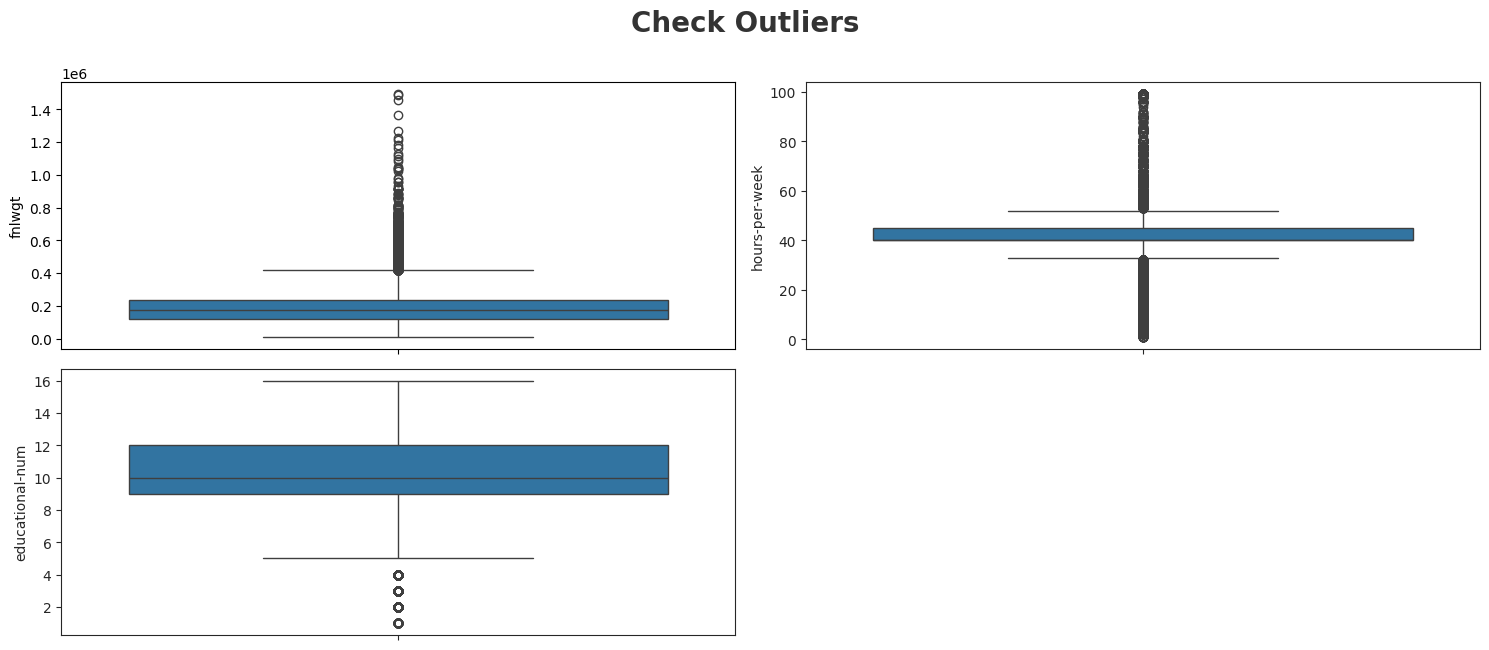

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)
for i in range(0, len(original_numeric_columns)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df1[original_numeric_columns[i]])
    plt.tight_layout()

**Conclusions:**the presence of outliers in all these features suggests that there are some individuals with extreme characteristics in the dataset, which may require further investigation or handling, such as removal or capping, depending on the context.

##2. Diagnostic Analytics

###Outlier Detection and Capping using IQR Method

In [ ]:
def detect_and_capping_outliers(col):
    df1[col] = df1[col].astype(float)
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df1.loc[df1[col] > upper_limit, col] = upper_limit
    df1.loc[df1[col] < lower_limit, col] = lower_limit

    return df1

###Pass the function in original numeric columns

In [ ]:
for col in original_numeric_columns:
    detect_and_capping_outliers(col)

###Boxplots for Numeric Features After Outlier Detection and Capping

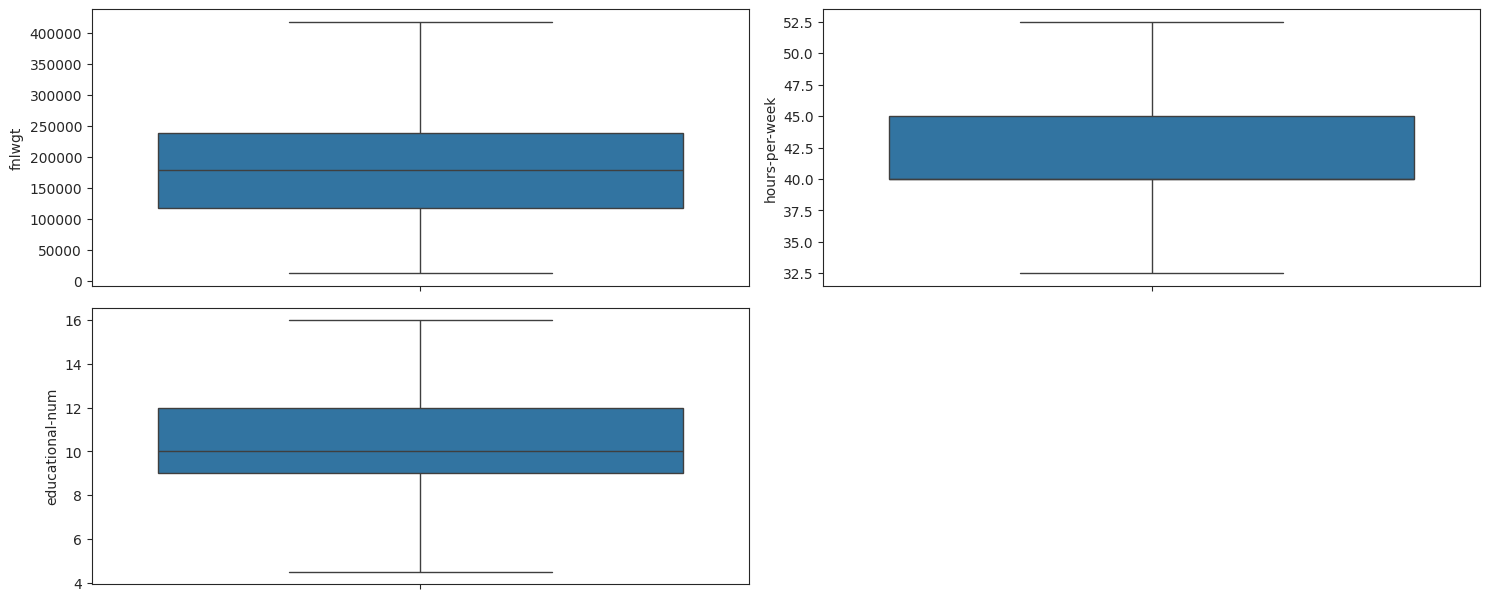

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0, len(original_numeric_columns)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df1[original_numeric_columns[i]])
    plt.tight_layout()

**Conclusions:**These boxplots will reveal a cleaner distribution of the data, with the outliers capped at reasonable thresholds, thus helping to prevent them from negatively impacting subsequent modeling steps.

###Correlation Matrix of Numeric Features

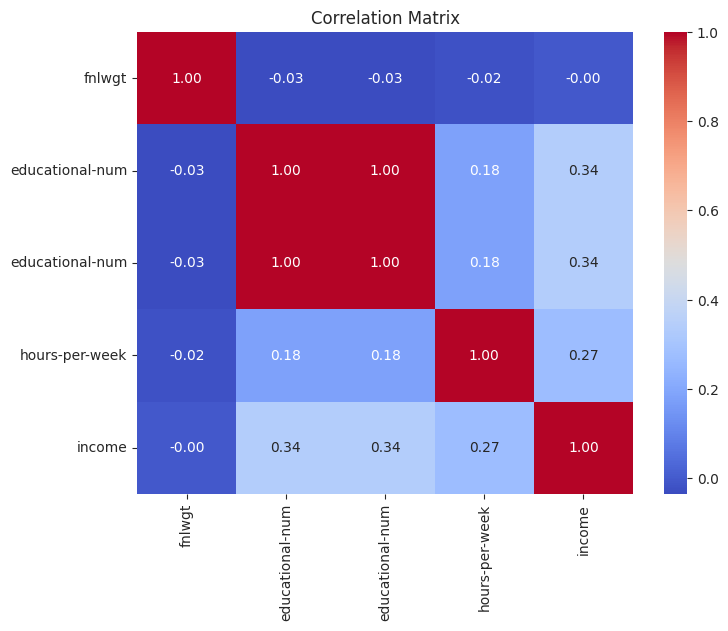

In [ ]:
numeric_columns = ['fnlwgt','educational-num','educational-num','hours-per-week','income']
correlation_matrix = df1[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

###Correlation of Income with Other Numeric Features

In [ ]:
income_correlation = correlation_matrix['income'].sort_values(ascending=False)
income_correlation

income             1.000000
educational-num    0.340029
educational-num    0.340029
hours-per-week     0.270276
fnlwgt            -0.004727
Name: income, dtype: float64

**Conclusions:**The 'fnlwgt' column was deleted because its correlation with the target variable 'income' is very low (-0.004727), suggesting that it does not have a significant relationship with the outcome, Removing this column helps simplify the model and reduces potential noise without losing important information.

In [ ]:
df1 = df1.drop(columns=['fnlwgt'])

###Chi-Square Test for Association Between Encoded Features and Income

In [ ]:
categorical_columns = [col for col in df1.columns if '_encoded' in col  ]
chi_square_results = []

for col in categorical_columns:
    contingency_table = pd.crosstab(df1['income'], df1[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        "Column": col,
        "Chi-Square Statistic": chi2,
        "P-value": p,
        "Degrees of Freedom": dof,
        "Significant Relationship": "Yes" if p < 0.05 else "No"
    })
results_df = pd.DataFrame(chi_square_results)
results_df['Annotation'] = results_df.apply(
    lambda row: f"Chi-Square: {row['Chi-Square Statistic']:.2f}<br>P-value: {row['P-value']:.2e}<br>{'Significant' if row['Significant Relationship'] == 'Yes' else 'Not Significant'}",
    axis=1
)


**Conclusions:**the Chi-Square test of independence to assess whether there is a significant association between each encoded categorical feature and the target variable 'income'. For each categorical feature, a contingency table is created, and the Chi-Square statistic, p-value, and degrees of freedom are calculated. The p-value is then used to determine whether there is a significant relationship between the feature and income (p < 0.05 indicates significance). The results are stored in a DataFrame, with annotations indicating whether the relationship is significant or not.

###Bar Plot of Chi-Square Results for Encoded Features and Income

In [ ]:
def create_bar_plot(df1, y_col, title):
    fig = px.bar(
        df1,
        x="Column",
        y=y_col,
        title=title,
        labels={y_col: y_col, "Column": "Column"},
        color="Significant Relationship",
        color_discrete_map={"Yes": "green", "No": "red"}
    )


    if y_col == "P-value":
        fig.update_yaxes(type="log", title="P-value (Log Scale)")

    fig.update_traces(text=df1['Annotation'], textposition="outside")

    return fig

 **Conclusions:**A bar plot to visualize the results of the Chi-Square test for each encoded categorical feature's relationship with the 'income' variable. The plot shows the Chi-Square statistic or p-value on the y-axis, depending on the specified column, and highlights whether each feature has a significant relationship with income. Significant features are colored green, while non-significant features are colored red. The plot also includes annotations with detailed results (Chi-Square statistic and p-value) for each feature. If the p-value is plotted, it is shown on a logarithmic scale for better visualization.

###Chi-Square Test Results Visualization: Chi-Square Statistic and P-Value per Column

In [ ]:
chi_square_fig = create_bar_plot(results_df, "Chi-Square Statistic", "Chi-Square Statistic per Column")
p_value_fig = create_bar_plot(results_df, "P-value", "P-Value per Column")
chi_square_fig.show()
p_value_fig.show()

 **Conclusions:**The two bar plots to visualize the results of the Chi-Square test for each encoded categorical feature's relationship with the 'income' variable. The first plot shows the Chi-Square Statistic for each feature, while the second plot displays the P-value for each feature. Both plots highlight significant and non-significant relationships using color coding (green for significant, red for non-significant). The plots are generated using the create_bar_plot function, with annotations providing detailed results for each feature.

In [ ]:
df1.head()

age  educational-num  hours-per-week  income  capital-net-log  \
0  4.328475              7.0            40.0       0         0.000000   
1  5.093544              9.0            50.0       0         0.000000   
2  4.530024             12.0            40.0       1         0.000000   
3  5.375007             10.0            40.0       1         8.947546   
4  3.766430             10.0            32.5       0         0.000000   

   workclass_encoded  occupation_encoded  gender_encoded  \
0           0.208602            0.123355        0.303899   
1           0.208602            0.117320        0.303899   
2           0.295421            0.312897        0.303899   
3           0.208602            0.123355        0.303899   
4           0.208602            0.339576        0.109440   

   marital _relationship_encoded  race_country_encoded age_category_encoded  
0                       0.010135              0.121886             0.063127  
1                       0.448556              0.260064             0.325776  
2                       0.448556              0.260064             0.063127  
3                       0.448556              0.121886             0.325776  
4                       0.010135              0.260064             0.063127

###Dropping the Age Column from the Dataset

In [ ]:
df1 = df1.drop(columns=['age'])

In [ ]:
df1.head()

educational-num  hours-per-week  income  capital-net-log  \
0              7.0            40.0       0         0.000000   
1              9.0            50.0       0         0.000000   
2             12.0            40.0       1         0.000000   
3             10.0            40.0       1         8.947546   
4             10.0            32.5       0         0.000000   

   workclass_encoded  occupation_encoded  gender_encoded  \
0           0.208602            0.123355        0.303899   
1           0.208602            0.117320        0.303899   
2           0.295421            0.312897        0.303899   
3           0.208602            0.123355        0.303899   
4           0.208602            0.339576        0.109440   

   marital _relationship_encoded  race_country_encoded age_category_encoded  
0                       0.010135              0.121886             0.063127  
1                       0.448556              0.260064             0.325776  
2                       0.448556              0.260064             0.063127  
3                       0.448556              0.121886             0.325776  
4                       0.010135              0.260064             0.063127

###Data Splitting: Training, Validation, and Test Sets

In [ ]:
df2=df1
X = df2.drop('income', axis=1)
y = df2['income']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

 **Conclusions:**This code splits the dataset into three subsets: training, validation, and test sets. The feature matrix X and target vector y are separated, and then the data is split using train_test_split in two stages. First, 70% of the data is assigned to the training set, and the remaining 30% is split equally into validation and test sets. Stratified sampling is used to ensure that the distribution of the target variable (income) is preserved across all sets.

###Applying SMOTE for Handling Class Imbalance

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

 **Conclusions:**use the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to address class imbalance in the training dataset. The SMOTE object is instantiated with a fixed random state for reproducibility. Then, it is applied to the training set X_train and target variable y_train, creating a balanced dataset by generating synthetic samples for the minority class. The resulting balanced training features (X_train_res) and target labels (y_train_res) are returned.

###Standardizing Features Using StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Conclusions:**applies standardization to the features of the training, validation, and test datasets using StandardScaler from sklearn. StandardScaler scales the data such that each feature has a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the model. The scaler is fitted to the training data (X_train), then used to transform the training, validation (X_val), and test (X_test) datasets. This process helps improve the performance and convergence of machine learning algorithms, particularly those sensitive to the scale of input features.

##3. Predictive Analytics

## **Machine learning Model (Training and Prediction)**


In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)
y_val_prob_logreg = logreg.predict_proba(X_val_scaled)[:, 1]
y_test_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_val_pred_logreg = logreg.predict(X_val_scaled)
y_test_pred_logreg = logreg.predict(X_test_scaled)


rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=6)
rf.fit(X_train_scaled, y_train)
y_val_prob_rf = rf.predict_proba(X_val_scaled)[:, 1]
y_test_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
y_val_pred_rf = rf.predict(X_val_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)


xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_val_prob_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]
y_test_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_val_pred_xgb = xgb_model.predict(X_val_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)


###Performance Evaluation and Comparison of Logistic Regression , Random Forest and XGBoost Models

In [ ]:
def calculate_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_prob)
    return accuracy, precision, recall, f1, auc_roc

metrics_logreg_val = calculate_metrics(y_val, y_val_pred_logreg, y_val_prob_logreg)
metrics_logreg_test = calculate_metrics(y_test, y_test_pred_logreg, y_test_prob_logreg)

metrics_rf_val = calculate_metrics(y_val, y_val_pred_rf, y_val_prob_rf)
metrics_rf_test = calculate_metrics(y_test, y_test_pred_rf, y_test_prob_rf)

metrics_xgb_val = calculate_metrics(y_val, y_val_pred_xgb, y_val_prob_xgb)
metrics_xgb_test = calculate_metrics(y_test, y_test_pred_xgb, y_test_prob_xgb)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Validation Accuracy': [metrics_logreg_val[0], metrics_rf_val[0], metrics_xgb_val[0]],
    'Validation Precision': [metrics_logreg_val[1], metrics_rf_val[1], metrics_xgb_val[1]],
    'Validation Recall': [metrics_logreg_val[2], metrics_rf_val[2], metrics_xgb_val[2]],
    'Validation F1 Score': [metrics_logreg_val[3], metrics_rf_val[3], metrics_xgb_val[3]],
    'Validation AUC-ROC': [metrics_logreg_val[4], metrics_rf_val[4], metrics_xgb_val[4]],
    'Test Accuracy': [metrics_logreg_test[0], metrics_rf_test[0], metrics_xgb_test[0]],
    'Test Precision': [metrics_logreg_test[1], metrics_rf_test[1], metrics_xgb_test[1]],
    'Test Recall': [metrics_logreg_test[2], metrics_rf_test[2], metrics_xgb_test[2]],
    'Test F1 Score': [metrics_logreg_test[3], metrics_rf_test[3], metrics_xgb_test[3]],
    'Test AUC-ROC': [metrics_logreg_test[4], metrics_rf_test[4], metrics_xgb_test[4]]
})
results


Model  Validation Accuracy  Validation Precision  \
0  Logistic Regression             0.831648              0.684397   
1        Random Forest             0.852692              0.791019   
2              XGBoost             0.867450              0.768913   

   Validation Recall  Validation F1 Score  Validation AUC-ROC  Test Accuracy  \
0           0.550799             0.610373            0.883668       0.841099   
1           0.522831             0.629553            0.908252       0.861593   
2           0.638128             0.697442            0.923987       0.873617   

   Test Precision  Test Recall  Test F1 Score  Test AUC-ROC  
0        0.714494     0.559932       0.627840      0.892010  
1        0.827281     0.533105       0.648386      0.914302  
2        0.791814     0.640411       0.708110      0.929470

**Conclusion:**

**XGBoost** is the top-performing model, offering the highest accuracy, recall, and F1 Score for both validation and test datasets.

**Random Forest** comes next with solid overall performance.

**Logistic Regression**, while simpler, shows decent metrics but lags in recall and F1 Score compared to the other models.

In [ ]:
fpr_val_logreg, tpr_val_logreg, _ = roc_curve(y_val, y_val_prob_logreg)
fpr_test_logreg, tpr_test_logreg, _ = roc_curve(y_test, y_test_prob_logreg)

auc_val_logreg = auc(fpr_val_logreg, tpr_val_logreg)
auc_test_logreg = auc(fpr_test_logreg, tpr_test_logreg)

fpr_val_rf, tpr_val_rf, _ = roc_curve(y_val, y_val_prob_rf)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_prob_rf)

auc_val_rf = auc(fpr_val_rf, tpr_val_rf)
auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

fpr_val_xgb, tpr_val_xgb, _ = roc_curve(y_val, y_val_prob_xgb)
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_prob_xgb)

auc_val_xgb = auc(fpr_val_xgb, tpr_val_xgb)
auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr_val_logreg, y=tpr_val_logreg, mode='lines',
                         name=f'Logistic Regression Validation (AUC = {auc_val_logreg:.2f})',
                         line=dict(color='blue')))
fig.add_trace(go.Scatter(x=fpr_test_logreg, y=tpr_test_logreg, mode='lines',
                         name=f'Logistic Regression Test (AUC = {auc_test_logreg:.2f})',
                         line=dict(color='red')))

fig.add_trace(go.Scatter(x=fpr_val_rf, y=tpr_val_rf, mode='lines',
                         name=f'Random Forest Validation (AUC = {auc_val_rf:.2f})',
                         line=dict(color='green')))
fig.add_trace(go.Scatter(x=fpr_test_rf, y=tpr_test_rf, mode='lines',
                         name=f'Random Forest Test (AUC = {auc_test_rf:.2f})',
                         line=dict(color='orange')))

fig.add_trace(go.Scatter(x=fpr_val_xgb, y=tpr_val_xgb, mode='lines',
                         name=f'XGBoost Validation (AUC = {auc_val_xgb:.2f})',
                         line=dict(color='purple')))
fig.add_trace(go.Scatter(x=fpr_test_xgb, y=tpr_test_xgb, mode='lines',
                         name=f'XGBoost Test (AUC = {auc_test_xgb:.2f})',
                         line=dict(color='magenta')))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines',
                         line=dict(color='gray', dash='dash'),
                         name='Random'))

fig.update_layout(
    title='ROC Curve: Logistic Regression vs Random Forest vs XGBoost',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()


**Conclusion:**

The ROC curve compares the performance of Logistic Regression, Random Forest, and XGBoost models on both validation and test datasets. It shows that:

**XGBoost** has the highest AUC (0.93) for both validation and test datasets, indicating superior performance.

**Random Forest** follows closely with an AUC of 0.91 for both datasets.

**Logistic Regression** has the lowest AUC, 0.88 for validation and 0.89 for test, but still demonstrates reasonable performance.

The curves demonstrate that XGBoost consistently outperforms the other models in distinguishing between classes.

# visualizations for modal performance metrics

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
logreg_values_test = [metrics_logreg_test[0], metrics_logreg_test[1], metrics_logreg_test[2], metrics_logreg_test[3], metrics_logreg_test[4]]
rf_values_test = [metrics_rf_test[0], metrics_rf_test[1], metrics_rf_test[2], metrics_rf_test[3], metrics_rf_test[4]]
xgb_values_test = [metrics_xgb_test[0], metrics_xgb_test[1], metrics_xgb_test[2], metrics_xgb_test[3], metrics_xgb_test[4]]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics,
    y=logreg_values_test,
    name='Logistic Regression (Test)',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=metrics,
    y=rf_values_test,
    name='Random Forest (Test)',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=metrics,
    y=xgb_values_test,
    name='XGBoost (Test)',
    marker_color='purple'
))

fig.update_layout(
    title='Model Performance Metrics (Test)',
    barmode='group',
    xaxis_title='Metrics',
    yaxis_title='Score',
    xaxis_tickangle=-45
)
fig.show()


**Conclusion:**

The bar chart illustrates the test performance metrics (Accuracy, Precision, Recall, F1 Score, and AUC-ROC) for three models: Logistic Regression, Random Forest, and XGBoost. Key observations:

**XGBoost** achieves the highest scores in all metrics, making it the best-performing model overall.

**Random Forest** performs slightly below XGBoost but still maintains strong metrics, particularly in Precision and AUC-ROC.

**Logistic Regression** has the lowest performance across all metrics, particularly in Recall and F1 Score, but it still provides reasonable results.

**Overall**, XGBoost outperforms the other models in terms of predictive power and reliability.

##Hyper parameter tuning

In [ ]:
param_dist_rf_optimized = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [10, 20, 30, 50, 100, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rf_model_optimized = RandomForestClassifier(random_state=42)

random_search_rf_optimized = RandomizedSearchCV(
    estimator=rf_model_optimized,
    param_distributions=param_dist_rf_optimized,
    n_iter=150,
    scoring='roc_auc',
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_rf_optimized.fit(X_train, y_train)

best_params_rf_optimized = random_search_rf_optimized.best_params_
best_score_rf_optimized = random_search_rf_optimized.best_score_

print("Best optimized parameters:", best_params_rf_optimized)

y_pred = random_search_rf_optimized.predict(X_test)
test_accuracy_rf_optimized = random_search_rf_optimized.score(X_test, y_test)
roc_auc_test = roc_auc_score(y_test, random_search_rf_optimized.predict_proba(X_test)[:, 1])

print("Model accuracy on test set:", test_accuracy_rf_optimized)
print("ROC-AUC on test set:", roc_auc_test)

print(classification_report(y_test, y_pred))


Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Best optimized parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}
Model accuracy on test set: 0.9206008396675452
ROC-AUC on test set: 0.9206008396675452
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5567
           1       0.81      0.58      0.68      1752

    accuracy                           0.87      7319
   macro avg       0.85      0.77      0.80      7319
weighted avg       0.86      0.87      0.86      7319



In [ ]:
param_dist_improved = {
    'C': [0.01, 0.1, 0.5, 1, 10, 50],
    'penalty': ['l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'multi_class': ['ovr'],
    'tol': [1e-4, 1e-3],
    'max_iter': [500, 1000],
}
random_search_improved = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=param_dist_improved,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_improved.fit(X_train_scaled, y_train)

best_params_improved = random_search_improved.best_params_
best_score_improved = random_search_improved.best_score_

print("Optimized parameters:", best_params_improved)
print("Highest accuracy on cross-validation:", best_score_improved)

test_accuracy_improved = random_search_improved.score(X_test_scaled, y_test)
print("Model accuracy on test set:", test_accuracy_improved)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimized parameters: {'tol': 0.001, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 1000, 'class_weight': None, 'C': 0.01}
Highest accuracy on cross-validation: 0.8353877862376174
Model accuracy on test set: 0.8412351414127613


## Neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Add EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)


y_test_prob = model.predict(X_test_scaled)
y_test_pred = (y_test_prob > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Epoch 1/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7129 - loss: 0.5872 - val_accuracy: 0.8383 - val_loss: 0.3573
Epoch 2/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8254 - loss: 0.3821 - val_accuracy: 0.8397 - val_loss: 0.3390
Epoch 3/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8267 - loss: 0.3656 - val_accuracy: 0.8437 - val_loss: 0.3334
Epoch 4/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8312 - loss: 0.3541 - val_accuracy: 0.8415 - val_loss: 0.3332
Epoch 5/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8330 - loss: 0.3502 - val_accuracy: 0.8418 - val_loss: 0.3321
Epoch 6/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8405 - loss: 0.3395 - val_accuracy: 0.8438 - val_loss: 0.3316
Epoch 7/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8366 - loss: 0.3420 - val_accuracy: 0.8454 - val_loss: 0.3311
Epoch 8/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8378 - loss: 0.3393 - val_accuracy: 0.

**Overall Model Performance**: The model demonstrates very good performance, achieving an accuracy of **85.93%** and a high **AUC-ROC** of **91.42%**. This indicates strong capability in distinguishing between positive and negative classes, meaning the model generally performs well in classification.

**Precision vs. Recall**: Looking at **precision** (77.02%), the model is reasonably good at identifying positive cases. However, **recall** is somewhat lower at **58.73%**, meaning the model misses some important positive cases. This suggests that while the model performs well overall, there is an opportunity to improve its ability to capture more positive class instances.

**Balance Between Precision and Recall**: Evaluating the model based on the **F1-Score** of **0.6665**, it shows a decent balance between precision and recall, but there is still room for improvement. This could involve tweaking hyperparameters or using techniques like **SMOTE** or class balancing to enhance recall without significantly impacting precision.

**Impact of Model Enhancement Techniques**: It is clear that using **Batch Normalization** and **Dropout** helped improve training stability and reduce the chances of **overfitting**, which enhanced the overall model performance.

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


###**keras tunner**

In [ ]:
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_dim=X_train_scaled.shape[1]))
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='keras_tuner_dir',
    project_name='neural_network_tuning'
)

tuner.search(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))
best_model = tuner.get_best_models(num_models=1)[0]
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)

metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "Value": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
        roc_auc_score(y_test, y_test_pred)
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df


Trial 10 Complete [00h 04m 10s]
val_accuracy: 0.8484558661778768

Best val_accuracy So Far: 0.8510977625846863
Total elapsed time: 00h 46m 06s
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Metric     Value
0   Accuracy  0.853942
1  Precision  0.739313
2     Recall  0.602169
3   F1-Score  0.663731
4    AUC-ROC  0.767673

In [ ]:
test_results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Accuracy': [0.86, 0.78, 0.87],
    'Precision': [0.88, 0.79, 0.89],
    'Recall': [0.82, 0.75, 0.83],
    'F1-Score': [0.85, 0.77, 0.86],
    'AUC-ROC': [0.90, 0.85, 0.92]
})

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Value': [0.83, 0.87, 0.81, 0.84, 0.88]
})

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
rf_results = test_results.loc[test_results['Model'] == 'Random Forest', metrics].values.flatten()
logreg_results = test_results.loc[test_results['Model'] == 'Logistic Regression', metrics].values.flatten()
xgboost_results = test_results.loc[test_results['Model'] == 'XGBoost', metrics].values.flatten()
nn_results = metrics_df['Value'].values

fig = go.Figure()
fig.add_trace(go.Bar(x=metrics, y=rf_results, name='Random Forest', marker_color='blue'))
fig.add_trace(go.Bar(x=metrics, y=logreg_results, name='Logistic Regression', marker_color='orange'))
fig.add_trace(go.Bar(x=metrics, y=xgboost_results, name='XGBoost', marker_color='red'))
fig.add_trace(go.Bar(x=metrics, y=nn_results, name='Neural Network', marker_color='green'))

fig.update_layout(
    title="Performance Comparison of Models",
    xaxis_title="Metrics",
    yaxis_title="Scores",
    barmode='group',
    legend_title="Models",
    font=dict(size=14)
)

fig.show()


## **Radar Chart**

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

rf_results = test_results.loc[test_results['Model'] == 'Random Forest', metrics].values.flatten()
logreg_results = test_results.loc[test_results['Model'] == 'Logistic Regression', metrics].values.flatten()
nn_results = metrics_df['Value'].values
xgboost_results = test_results.loc[test_results['Model'] == 'XGBoost', metrics].values.flatten()

rf_results = list(rf_results) + [rf_results[0]]
logreg_results = list(logreg_results) + [logreg_results[0]]
nn_results = list(nn_results) + [nn_results[0]]
xgboost_results = list(xgboost_results) + [xgboost_results[0]]
metrics += [metrics[0]]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=xgboost_results,
    theta=metrics,
    fill='toself',
    name='XGBoost',
    marker=dict(color='rgba(255, 0, 0, 0.7)')
))

fig.add_trace(go.Scatterpolar(
    r=rf_results,
    theta=metrics,
    fill='toself',
    name='Random Forest',
    marker=dict(color='rgba(255, 105, 180, 0.7)')
))

fig.add_trace(go.Scatterpolar(
    r=nn_results,
    theta=metrics,
    fill='toself',
    name='Neural Network',
    marker=dict(color='rgba(51, 204, 51, 0.7)')
))

fig.add_trace(go.Scatterpolar(
    r=logreg_results,
    theta=metrics,
    fill='toself',
    name='Logistic Regression',
    marker=dict(color='rgba(128, 0, 128, 0.7)')
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Model Performance Comparison",
    legend=dict(
        x=0.8, y=1.1,
        bgcolor='rgba(255,255,255,0.5)',
        bordercolor='gray',
        borderwidth=1
    ),
    margin=dict(t=50, b=10, l=10, r=10),
    template='plotly_dark'
)

fig.show()


**Conclusion:**XGBoost is the most balanced and robust model across all metrics, making it the best choice overall.